In [101]:
# Beckham Carver
# 7/19/2024
# Exploratory Data Analysis
# COSC 4557

# Sources:
- https://www.kaggle.com/datasets/jpmiller/police-violence-in-the-us
- https://www.unitedstateszipcodes.org/zip-code-database/population/
- https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
- https://datascientyst.com/convert-column-to-categorical-pandas-dataframe-examples/
- https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-in-pandas
- https://stackoverflow.com/questions/50449088/check-if-value-from-one-dataframe-exists-in-another-dataframe
- https://www.slingacademy.com/article/understanding-dataframe-transform-method-in-pandas-5-examples/
- https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
- https://seaborn.pydata.org/tutorial/categorical.html
- RTodd had some good starter data verification functions in warmup, this led me to the sklearn docs and explored from there
- ChatGPT for checkpoint 49, was really impressed (and scared by) how well it did.

# __
I ended up choosing a pretty heavy topic for the data analysis, that being a 'Police Violence & Racial Equity' dataset from Kaggle, as well as a zipcode database that gives the IRS estimated population. (As a sidenote I'd bet the IRS undercounts compared to Census data, and that discrepency in population likely correlates with crime rates. But that is not what I'll be exploring.) I would like to explore the correlation between population/geography with transparency/efficacy of police departments regarding documentation and court results of the incidents. My hypothesis is that areas that are more rural with a smaller population will on average be less transparent. Transparency meaning lack of released images and body camera footage; as well as the presence of unreleased names, pending cases, and unknown/unclear values. The population data set estimates from 2010 data, and the police violence set is from 2014-2019- this is not a perfect match but close enough to find trends. This data is heavily categorical, with population and age really being the only numeric data, this eliminates quite a few plots from being very useful.

# __
For handling the data, I started by opening up both CSV's with the 'data wrangler' extension for VScode. This is really useful for not only displaying the data, but scripting/modifying it in a separate environment. I began by working with the police_killings_MPV dataset.

In [102]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10.0

dfp = pd.read_csv('rawdata/police-statistics\police_killings_MPV.csv')
dfp


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\860242848.py:8: SyntaxWarning: invalid escape sequence '\p'
  dfp = pd.read_csv('rawdata/police-statistics\police_killings_MPV.csv')
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\860242848.py:8: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp = pd.read_csv('rawdata/police-statistics\police_killings_MPV.csv')


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,NaN,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name withheld by police,22,Male,Unknown race,NaN,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,NaN,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,01/01/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,01/01/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,01/01/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,01/01/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
dfp.axes

[RangeIndex(start=0, stop=8427, step=1),
 Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
        'URL of image of victim', 'Date of Incident (month/day/year)',
        'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
        'Agency responsible for death', 'ORI Agency Identifier (if available)',
        'Cause of death',
        'A brief description of the circumstances surrounding the death',
        'Official disposition of death (justified or other)',
        'Criminal Charges?',
        'Link to news article or photo of official document',
        'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
        'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
        'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
        'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
        'Off-Duty Killing?',
        'Geography (via Trulia methodology based 

# __
Immediately (and in the data wrangler) I see columns 29-67 are unused. This could be a problem with the CSV header, but I can just drop the columns from the dataframe. I will also drop the ID columns, rename necessary columns and check for nulls.

In [104]:
dfp.drop(dfp.columns[range(29,68)], axis=1,inplace=True)
dfp.drop(['WaPo ID (If included in WaPo database)','Fatal Encounters ID', 'MPV ID'], axis=1, inplace=True)

dfp.rename(columns={'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )' : 'Geography'}, inplace=True)
dfp.rename(columns={'Official disposition of death (justified or other)' : 'Official Disposition'}, inplace=True)
dfp.rename(columns={'Date of Incident (month/day/year)' : 'Date'}, inplace=True)
dfp.rename(columns={'Victim\'s name' : 'Name'}, inplace=True)
dfp.rename(columns={'Victim\'s age' : 'Age'}, inplace=True)
dfp.rename(columns={'Victim\'s gender' : 'Gender'}, inplace=True)
dfp.rename(columns={'Victim\'s race' : 'Race'}, inplace=True)

dfp.isnull().sum()

Name                                                                                  0
Age                                                                                   0
Gender                                                                               12
Race                                                                                  0
URL of image of victim                                                             3888
Date                                                                                  0
Street Address of Incident                                                           87
City                                                                                  6
State                                                                                 0
Zipcode                                                                              36
County                                                                               14
Agency responsible for death    

# __
I will be pretty selective of what nulls to prune, in some cases a null is a useful category, in others we can omit the row. I will omit nulls in Zipcode, Agency/ORI, and Geography.

In [105]:
dfp.dropna(subset=['Zipcode', 'Agency responsible for death', 'ORI Agency Identifier (if available)', 'Geography'], inplace=True)
dfp.isnull().sum()

Name                                                                                  0
Age                                                                                   0
Gender                                                                                9
Race                                                                                  0
URL of image of victim                                                             3849
Date                                                                                  0
Street Address of Incident                                                           66
City                                                                                  3
State                                                                                 0
Zipcode                                                                               0
County                                                                                1
Agency responsible for death    

In [106]:
dfp['URL of image of victim'] = dfp['URL of image of victim'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) else True)
dfp['Link to news article or photo of official document'] = dfp['Link to news article or photo of official document'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) else True)
dfp['Body Camera (Source: WaPo)'] = dfp['Body Camera (Source: WaPo)'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) or x in ['Off-Duty', 'Off-duty', 'off-duty'] else True)
dfp['Off-Duty Killing?'] = dfp['Off-Duty Killing?'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) or x == 'No' else True)

In [107]:
dfp.dtypes

Name                                                                                object
Age                                                                                 object
Gender                                                                              object
Race                                                                                object
URL of image of victim                                                                bool
Date                                                                                object
Street Address of Incident                                                          object
City                                                                                object
State                                                                               object
Zipcode                                                                            float64
County                                                                              object

# __
Looking at the data types, most categorical variables are still listed as objects, such as gender, race, Zipcode, Geography etc. I'll make these categorical and then plot them to get an idea of what else needs to be cleaned. 

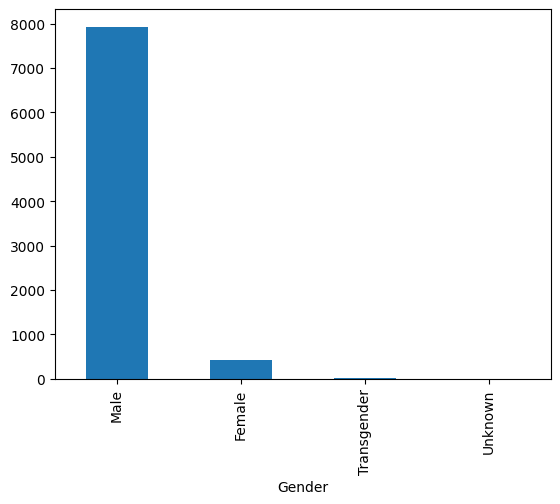

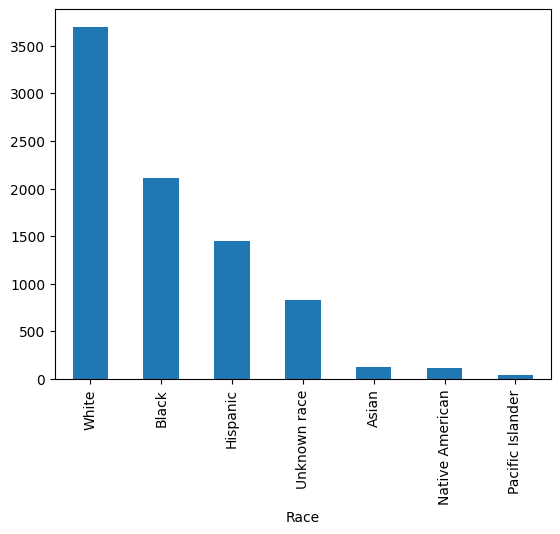

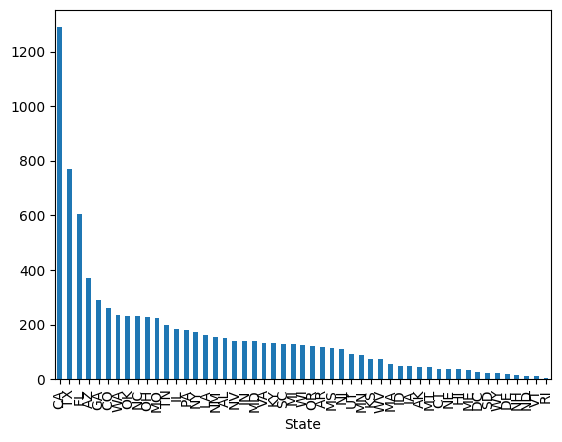

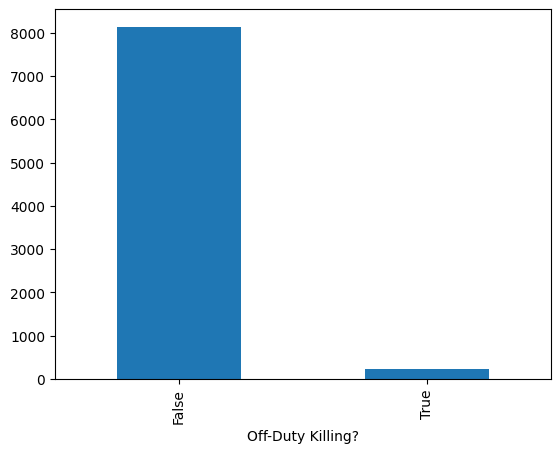

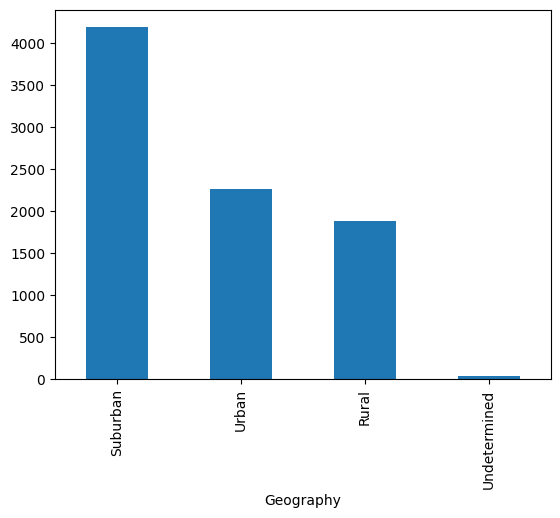

In [108]:
dfp['Gender'] = dfp['Gender'].astype('category')
dfp['Race'] = dfp['Race'].astype('category')
dfp['City'] = dfp['City'].astype('category')
dfp['State'] = dfp['State'].astype('category')
dfp['Zipcode'] = dfp['Zipcode'].astype('category')
dfp['County'] = dfp['County'].astype('category')
dfp['Agency responsible for death'] = dfp['Agency responsible for death'].astype('category')
dfp['Off-Duty Killing?'] = dfp['Off-Duty Killing?'].astype('category')
dfp['Geography'] = dfp['Geography'].astype('category')

dfp['Gender'].value_counts().plot(kind='bar')
plt.show()
dfp['Race'].value_counts().plot(kind='bar')
plt.show()
dfp['State'].value_counts().plot(kind='bar')
plt.show()
dfp['Off-Duty Killing?'].value_counts().plot(kind='bar')
plt.show()
dfp['Geography'].value_counts().plot(kind='bar')
plt.show()

###### It is tremendously concerning that WY ranks 45th in killings when it is by a WIDE MARGIN the smallest in population. These graphs are depressing in general, as expected.

# __
The last variable I would like to make categorical is Official Disposition. This has 133 unique values, in this step I'll group them by keywords, and drop entries that don't fit them. The categories in the end being pending, charged, unreported, and unknown.

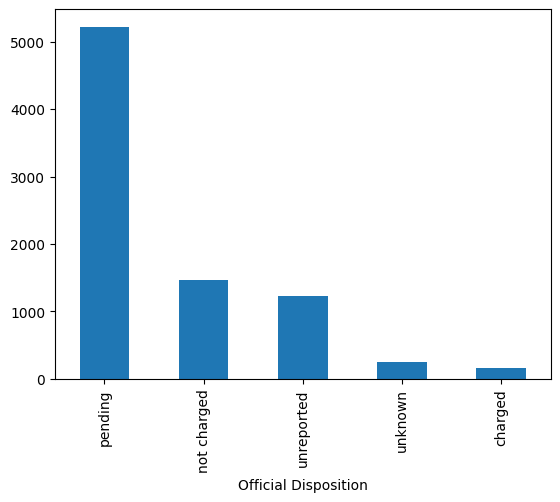

In [109]:
dfp['Official Disposition'] = dfp['Official Disposition'].astype('category')
dfp['Official Disposition'].value_counts()

def categorize(disposition):
    if pd.isna(disposition) or pd.isnull(disposition): return 'unreported'
    x = str(disposition).lower()
    if 'pending' in x or 'no known charges' in x: return 'pending'
    if 'unknown' in x: return 'unknown'
    if 'unreported' in x: return 'unreported'
    if 'justified' in x or 'aquit' in x or 'cleared' in x: return 'not charged'
    if 'charged' in x or 'convicted' in x or 'guilty' in x or 'murder' in x or 'family awarded' in x or 'civil suit' in x: return 'charged'
    return pd.NA

dfp['Official Disposition'] = dfp['Official Disposition'].transform(lambda x: categorize(x))
dfp.dropna(subset=['Official Disposition'], inplace=True)
dfp['Official Disposition'] = dfp['Official Disposition'].astype('category')

dfp['Official Disposition'].value_counts().plot(kind='bar')
plt.show()

# __
With the data relatively cleaned I'll add in the Zipcode population data where it matches, and trim wherever no population data is available.

In [110]:
dfz_temp = pd.read_csv('rawdata/zip_code_database.csv')
dfz = dfz_temp.filter(['zip', 'irs_estimated_population'])
dfz.drop_duplicates(subset=['zip'], keep='first')
dfz.dropna(inplace=True)
dfz


,zip,irs_estimated_population
0,501,562
1,544,0
2,601,0
3,602,0
4,603,0
...,...,...
42730,99926,1140
42731,99927,48
42732,99928,1530
42733,99929,2145


In [111]:
dfz = dfz[dfz['zip'].isin(dfp['Zipcode'])] # remove non-matching zips
dfp = dfp[dfp['Zipcode'].isin(dfz['zip'])] #

def pop(zipcode):
    ret = dfz.loc[dfz['zip'] == zipcode, 'irs_estimated_population']
    if (ret.size == 0): 
        #print("WHY WHY WHY these should be 1-1") # this is so stupid lost an hour of my life to TWO zipcodes hating me ???? It changed to like 30 zipcodes? After nearly no code changes
        #print(zipcode)
        return pd.NA
    else:
        return int(ret.iloc[0])

dfp['irs_pop'] = dfp['Zipcode'].apply(lambda x: pop(x))
dfp.dropna(subset=['irs_pop'], inplace=True)
dfp.describe().T


C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\3571097587.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['irs_pop'] = dfp['Zipcode'].apply(lambda x: pop(x))
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\3571097587.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp.dropna(subset=['irs_pop'], inplace=True)


,count,unique,top,freq
Name,8331,8047,Name withheld by police,245
Age,8331,87,25,274
Gender,8322,4,Male,7893
Race,8331,7,White,3675
URL of image of victim,8331,2,True,4496
Date,8331,2629,16/06/2013,10
Street Address of Incident,8266,8168,I-40,4
City,8329,3062,Los Angeles,120
State,8331,51,CA,1280
Zipcode,8331.0,5278.0,87121.0,10.0


# __
With the data I plan to use cleaned and the population data connected, I can now remove any leftover columns I do not plan to use and start actually exploring the data for trends.

In [112]:
dfp.drop(['Name', 'Age', 'Street Address of Incident', 'ORI Agency Identifier (if available)', 'Criminal Charges?','Cause of death', 
          'A brief description of the circumstances surrounding the death', 'Fleeing (Source: WaPo)',  'Symptoms of mental illness?','Unarmed/Did Not Have an Actual Weapon',
          'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)', 'Alleged Threat Level (Source: WaPo)'  
          ], axis=1, inplace=True)
print(dfp.info())
dfp.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 8331 entries, 15 to 8426
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   Gender                                              8322 non-null   category
 1   Race                                                8331 non-null   category
 2   URL of image of victim                              8331 non-null   bool    
 3   Date                                                8331 non-null   object  
 4   City                                                8329 non-null   category
 5   State                                               8331 non-null   category
 6   Zipcode                                             8331 non-null   category
 7   County                                              8330 non-null   category
 8   Agency responsible for death                        8331 non-null   cate

C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\2659276314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp.drop(['Name', 'Age', 'Street Address of Incident', 'ORI Agency Identifier (if available)', 'Criminal Charges?','Cause of death',


,count,unique,top,freq
Gender,8322,4,Male,7893
Race,8331,7,White,3675
URL of image of victim,8331,2,True,4496
Date,8331,2629,16/06/2013,10
City,8329,3062,Los Angeles,120
State,8331,51,CA,1280
Zipcode,8331.0,5278.0,87121.0,10.0
County,8330,1138,Los Angeles,357
Agency responsible for death,8331,3054,Los Angeles Police Department,130
Official Disposition,8331,5,pending,5221


C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\2596478443.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfp['Date'] = pd.to_datetime(dfp['Date'])
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\2596478443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Date'] = pd.to_datetime(dfp['Date'])
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\2596478443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Gender,Race,URL of image of victim,Date,City,State,Zipcode,County,Agency responsible for death,Official Disposition,Link to news article or photo of official document,Body Camera (Source: WaPo),Off-Duty Killing?,Geography,irs_pop
15,Male,White,False,2020-08-30,Clovis,CA,93612.0,Fresno,Clovis Police Department,pending,True,True,False,Suburban,29800
17,Male,Black,False,2020-08-29,Dearborn Heights,MI,48127.0,Wayne,Dearborn Heights Police Department,pending,True,True,False,Suburban,38140
18,Male,Black,False,2020-08-29,Daytona Beach,FL,32117.0,Volusia,"Holly Hill Police Department, Daytona Beach Po...",pending,True,True,False,Suburban,22740
19,Male,Unknown race,False,2020-08-29,Loma,CO,81524.0,Mesa,"Mesa County Sheriff's Office, Fruita Police De...",pending,True,True,False,Rural,2190
20,Male,Hispanic,False,2020-08-28,Elkridge,MD,21075.0,Howard,Maryland State Police,pending,True,True,False,Suburban,33530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Male,Hispanic,True,2013-01-01,Pueblo,CO,81008.0,Pueblo,Pueblo Police Department,not charged,True,False,False,Suburban,10920
8423,Male,Hispanic,True,2013-01-01,Bakersfield,CA,93304.0,Kern,Bakersfield Police Department,not charged,True,False,False,Urban,42720
8424,Male,Black,True,2013-01-01,Omaha,NE,68111.0,Douglas,Omaha Police Department,not charged,True,False,False,Urban,20700
8425,Male,Hispanic,True,2013-01-01,Farmington,NM,87401.0,San Juan,Farmington Police Department,unreported,True,False,False,Urban,32830


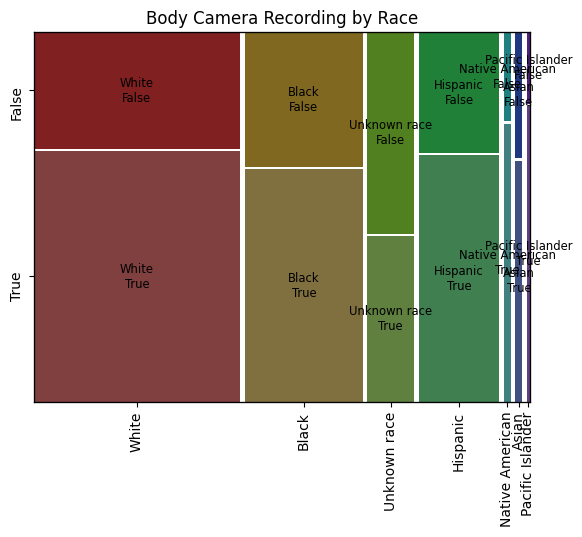

In [113]:
dfp['Date'] = pd.to_datetime(dfp['Date'])
dfp['irs_pop'] = dfp['irs_pop'].astype(int)

from statsmodels.graphics.mosaicplot import mosaic
mosaic(dfp, ['Race', 'Body Camera (Source: WaPo)'],
       title='Body Camera Recording by Race',
       label_rotation=90,
       gap=0.01)
plt.show
dfp

In [137]:

dfp['State_County'] = dfp['State'].astype(str) + '_' + dfp['County'].astype(str)
dfp['State_County'] = dfp['State_County'].astype('category')

sum_irs_pop = dfp.groupby('State_County')['irs_pop'].sum()
counts = dfp.groupby('State_County').agg({
    'State': lambda x: x.iloc[0],
    'Zipcode': 'count',  # counting total records in each county
    'Geography': lambda x: x.value_counts().to_dict(),
    'Gender': lambda x: x.value_counts().to_dict(),
    'Race': lambda x: x.value_counts().to_dict(),
    'Official Disposition': lambda x: x.value_counts().to_dict(),
    'Off-Duty Killing?': lambda x: x.value_counts().to_dict(),
    'Link to news article or photo of official document': lambda x: x.value_counts().to_dict(),
    'URL of image of victim': lambda x: x.value_counts().to_dict(),
    'Body Camera (Source: WaPo)': lambda x: x.value_counts().to_dict()
})
dfg = sum_irs_pop.to_frame().merge(counts, on='State_County')
dfg



C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\1762043012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['State_County'] = dfp['State'].astype(str) + '_' + dfp['County'].astype(str)
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\1762043012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['State_County'] = dfp['State_County'].astype('category')
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_20172\1762043012.py:4: FutureWarning: The default of observed=False is deprecated and

,irs_pop,State,Zipcode,Geography,Gender,Race,Official Disposition,Off-Duty Killing?,Link to news article or photo of official document,URL of image of victim,Body Camera (Source: WaPo)
State_County,,,,,,,,,,,
AK_Anchorage,244520,AK,12,"{'Suburban': 7, 'Urban': 5, 'Rural': 0, 'Undet...","{'Male': 12, 'Female': 0, 'Transgender': 0, 'U...","{'White': 5, 'Native American': 2, 'Unknown ra...","{'pending': 8, 'not charged': 3, 'unreported':...","{False: 12, True: 0}",{True: 12},"{False: 8, True: 4}","{True: 11, False: 1}"
AK_Fairbanks North Star,150080,AK,10,"{'Suburban': 6, 'Rural': 4, 'Undetermined': 0,...","{'Male': 10, 'Female': 0, 'Transgender': 0, 'U...","{'White': 6, 'Native American': 4, 'Asian': 0,...","{'pending': 9, 'not charged': 1, 'charged': 0,...","{False: 10, True: 0}",{True: 10},"{False: 5, True: 5}",{True: 10}
AK_Juneau,21620,AK,1,"{'Suburban': 1, 'Rural': 0, 'Undetermined': 0,...","{'Male': 1, 'Female': 0, 'Transgender': 0, 'Un...","{'White': 1, 'Black': 0, 'Asian': 0, 'Hispanic...","{'not charged': 1, 'charged': 0, 'pending': 0,...","{False: 1, True: 0}",{True: 1},{False: 1},{True: 1}
AK_Kenai Peninsula,13910,AK,5,"{'Rural': 5, 'Suburban': 0, 'Undetermined': 0,...","{'Male': 4, 'Female': 1, 'Transgender': 0, 'Un...","{'White': 5, 'Black': 0, 'Asian': 0, 'Hispanic...","{'pending': 4, 'not charged': 1, 'charged': 0,...","{False: 5, True: 0}",{True: 5},"{False: 4, True: 1}",{True: 5}
AK_Matanuska Susitna,187880,AK,6,"{'Rural': 6, 'Suburban': 0, 'Undetermined': 0,...","{'Male': 5, 'Female': 1, 'Transgender': 0, 'Un...","{'Black': 2, 'White': 2, 'Native American': 2,...","{'pending': 6, 'charged': 0, 'not charged': 0,...","{False: 6, True: 0}",{True: 6},"{True: 3, False: 3}",{True: 6}
...,...,...,...,...,...,...,...,...,...,...,...
WY_Fremont,57070,WY,4,"{'Rural': 4, 'Suburban': 0, 'Undetermined': 0,...","{'Male': 4, 'Female': 0, 'Transgender': 0, 'Un...","{'Unknown race': 2, 'Native American': 1, 'Whi...","{'pending': 2, 'unreported': 1, 'not charged':...","{False: 4, True: 0}",{True: 4},"{False: 3, True: 1}",{False: 4}
WY_Laramie,50050,WY,2,"{'Suburban': 2, 'Rural': 0, 'Undetermined': 0,...","{'Male': 2, 'Female': 0, 'Transgender': 0, 'Un...","{'Native American': 1, 'White': 1, 'Asian': 0,...","{'pending': 2, 'charged': 0, 'not charged': 0,...","{False: 2, True: 0}",{True: 2},{True: 2},{True: 2}
WY_Natrona,146250,WY,7,"{'Suburban': 5, 'Urban': 2, 'Rural': 0, 'Undet...","{'Male': 7, 'Female': 0, 'Transgender': 0, 'Un...","{'White': 6, 'Unknown race': 1, 'Asian': 0, 'H...","{'pending': 6, 'not charged': 1, 'charged': 0,...","{False: 6, True: 1}",{True: 7},"{False: 4, True: 3}","{True: 4, False: 3}"


The data is well setup for analysis, however I've sunk enough time so far- been learning a lot. I'm going to submit this here and wait for feedback before going further, I think I've fulfilled the assignment.